In [75]:
import pandas as pd
df = pd.read_csv("../data/processed/health_checkup_processed.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/health_checkup_processed.csv'

In [ ]:
df.shape, df.columns

((662648, 29),
 Index(['성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '청력(좌)',
        '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
        'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)',
        '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부', 'bmi', 'alt_ast_ratio',
        'tg_hdl_ratio', 'ggtp_alt_ratio', 'ldl_hdl_ratio', 'pulse_pressure',
        'hypertension_status'],
       dtype='object'))

In [ ]:
df['hypertension_status'].value_counts()

hypertension_status
0    555153
1    107495
Name: count, dtype: int64

| 값   | 의미    | 샘플 수    | 비율          |
| --- | ----- | ------- | ----------- |
| `0` | 정상 혈압 | 555,153 | 약 **83.8%** |
| `1` | 고혈압   | 107,495 | 약 **16.2%** |

| 관점         | 전략                                                                       |
| ---------- | ------------------------------------------------------------------------ |
| 분류 모델 선택 시 | `accuracy`만 보면 안 됨 → 고혈압(1)을 무시해도 정확도 높게 나옴                           |
| 평가 지표      | `precision`, `recall`, `F1-score`, **AUC-ROC** 등을 반드시 봐야 함               |
| 학습 데이터     | 언더샘플링/오버샘플링 고려 →  **SMOTE**, ADASYN, 또는 **XGBoost 내 class\_weight 조정** |

타겟 분포 확인 결과, 전체 데이터 중 약 16.2%가 고혈압 환자로 분류되며,  
이는 분류 모델 학습 시 클래스 불균형 문제를 고려해야 함을 시사 
정확도 외에도 정밀도(Precision), 재현율(Recall), AUC 등 다양한 평가지표와  
샘플링 전략 또는 가중치 보정이 함께 사용 필요

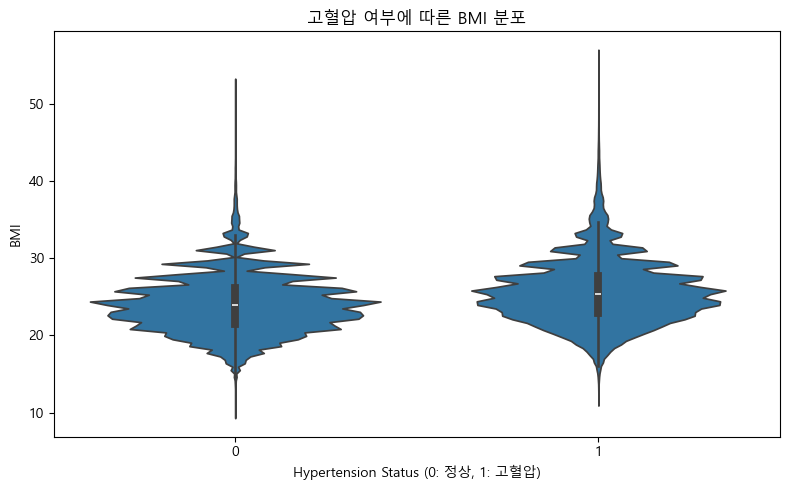

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows의 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우: 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 기호 깨짐 방지

plt.figure(figsize=(8, 5))
sns.violinplot(x='hypertension_status', y='bmi', data=df, inner='box')
plt.title("고혈압 여부에 따른 BMI 분포")
plt.xlabel("Hypertension Status (0: 정상, 1: 고혈압)")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

Violinplot을 통해 BMI 분포를 시각화한 결과,  
고혈압자는 정상자에 비해 BMI의 전체 분포가 우측으로 이동해 있으며,  
과체중~비만(BMI 27~30) 구간에 밀도 집중이 뚜렷하게 나타난다.  
이는 BMI가 고혈압 발생과 밀접한 관련이 있음을 시사하며,  
고도비만(BMI > 35)에서의 꼬리 확장은 고위험군 특성으로 해석

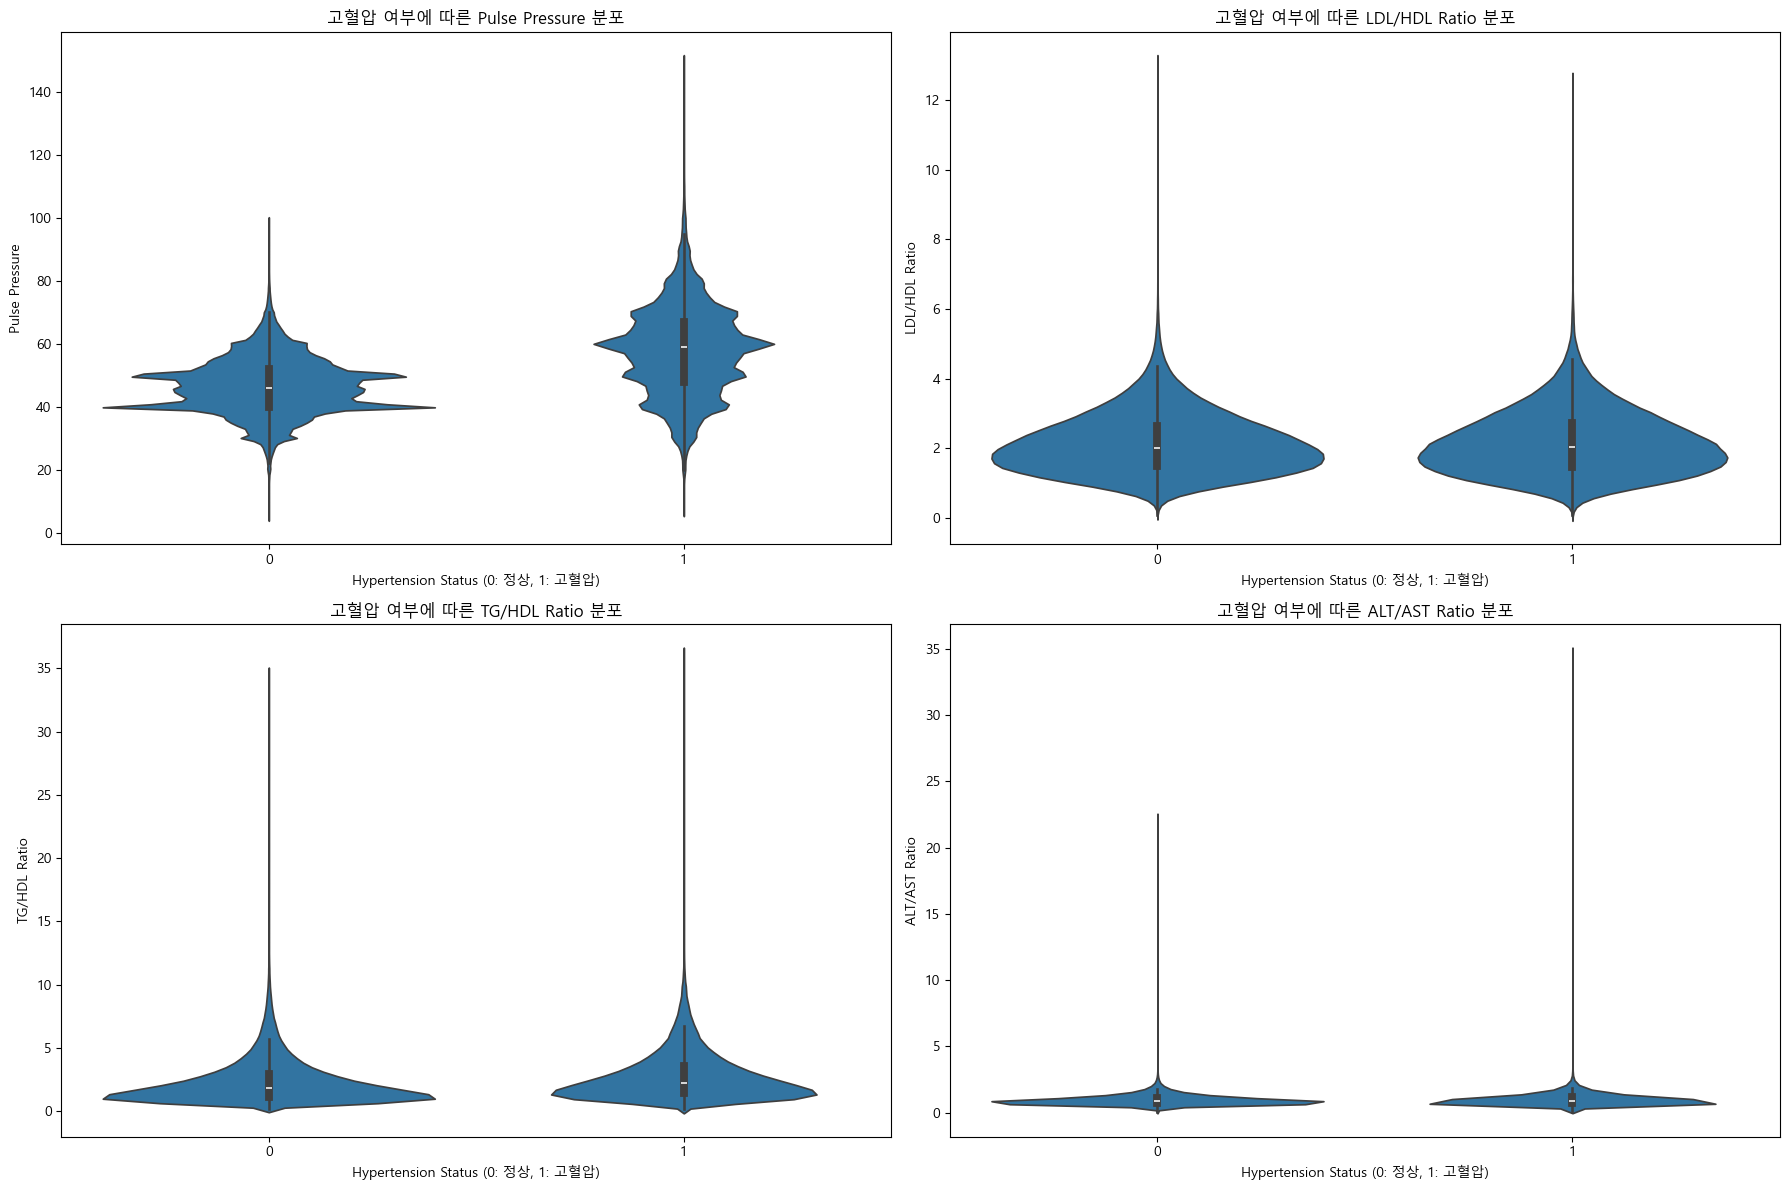

In [ ]:
# 시각화할 변수 리스트
plot_features = ['pulse_pressure', 'ldl_hdl_ratio', 'tg_hdl_ratio', 'alt_ast_ratio']
titles = ['Pulse Pressure', 'LDL/HDL Ratio', 'TG/HDL Ratio', 'ALT/AST Ratio']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(plot_features):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='hypertension_status', y=feature, data=df, inner='box')
    plt.title(f"고혈압 여부에 따른 {titles[i]} 분포")
    plt.xlabel("Hypertension Status (0: 정상, 1: 고혈압)")
    plt.ylabel(titles[i])

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
df_filtered2 = pd.read_csv("D:/python-workspace/DATA_ANALYSIS/health_checkup_processed.csv")

In [ ]:
# 한글 폰트 설정 (Windows의 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우: 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 기호 깨짐 방지

# 시력(좌)

Text(0, 0.5, 'Frequency')

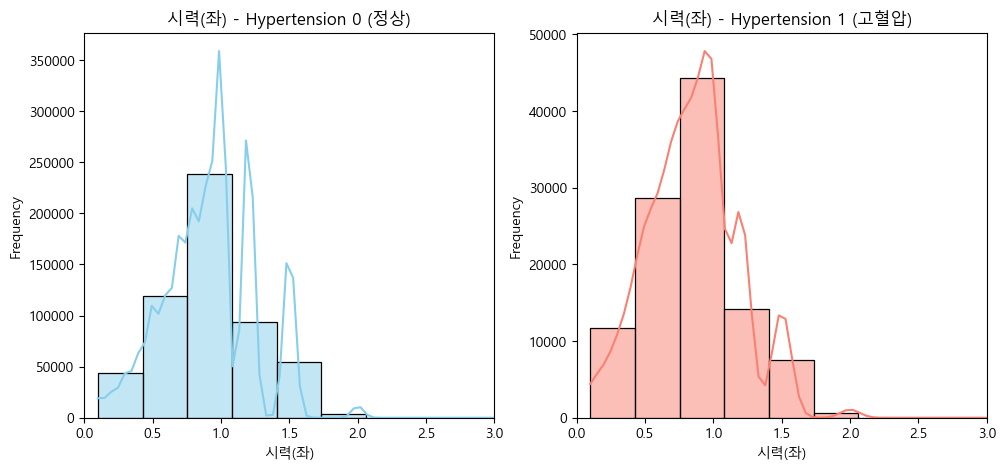

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_col1 = '시력(좌)'
target_col2 = 'LDL콜레스테롤'
target_col3 = '트리글리세라이드'
target_col4 = '식전혈당(공복혈당)'

group_0 = df_filtered2[df_filtered2['hypertension_status'] == 0] #정상
group_1 = df_filtered2[df_filtered2['hypertension_status'] == 1] #고혈압

plt.figure(figsize=(18, 5))

# 1) alt_ast_ratio - 고혈압 0
plt.subplot(1, 3, 1)
sns.histplot(group_0[target_col1], kde=True, bins=30, color='skyblue')
plt.title(f'{target_col1} - Hypertension 0 (정상)')
plt.xlim(0, 3)
plt.xlabel(target_col1)
plt.ylabel('Frequency')

# 2) alt_ast_ratio - 고혈압 1
plt.subplot(1, 3, 2)
sns.histplot(group_1[target_col1], kde=True, bins=30, color='salmon')
plt.title(f'{target_col1} - Hypertension 1 (고혈압)')
plt.xlim(0, 3)
plt.xlabel(target_col1)
plt.ylabel('Frequency')


C:\Users\asia\AppData\Local\Temp\ipykernel_24044\419694482.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')


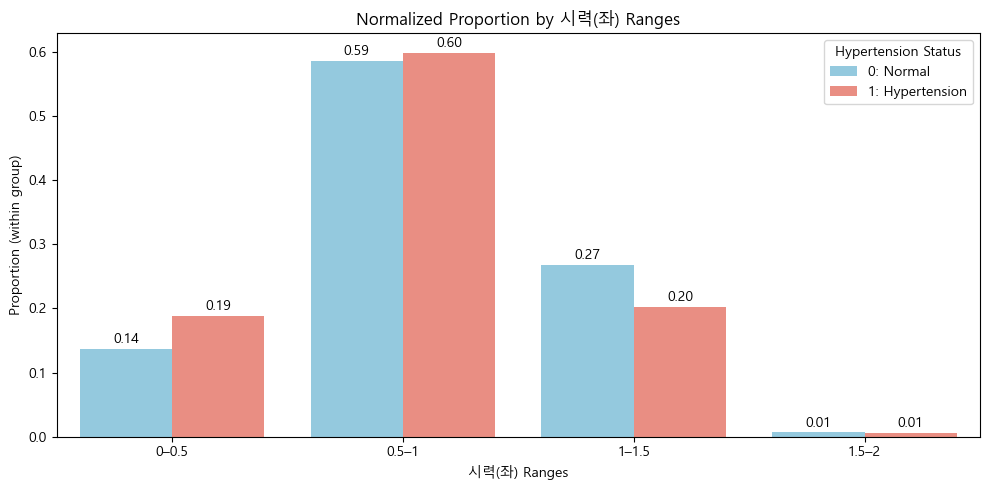

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 대상 변수 설정
target_col = '시력(좌)'

# 구간 나누기 (0~3, 0.5 단위 → 4개 구간)
bins = [0, 0.5, 1, 1.5, 2]
labels = ['0–0.5', '0.5–1', '1–1.5', '1.5–2']

df_filtered2['bin'] = pd.cut(df_filtered2[target_col], bins=bins, labels=labels, include_lowest=True)

# 각 그룹의 전체 수 (정규화 기준)
total_normal = len(df_filtered2[df_filtered2['hypertension_status'] == 0])
total_hyper = len(df_filtered2[df_filtered2['hypertension_status'] == 1])

# 구간별 count 계산
bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')

# 정규화된 비율 (각 그룹의 전체 수 대비 비율)
def normalize(row):
    if row['hypertension_status'] == 0:
        return row['count'] / total_normal
    else:
        return row['count'] / total_hyper

bin_counts['normalized_ratio'] = bin_counts.apply(normalize, axis=1)

# 시각화
plt.figure(figsize=(10, 5))
barplot = sns.barplot(  # ← barplot 객체로 저장
    data=bin_counts,
    x='bin',
    y='normalized_ratio',
    hue='hypertension_status',
    palette={0: 'skyblue', 1: 'salmon'}  # 각 클래스 색 명시
)

# 막대 위에 수치 표시
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

# 범례 수동 설정
handles, labels = barplot.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['0: Normal', '1: Hypertension'],
    title='Hypertension Status'
)

plt.title(f'Normalized Proportion by {target_col} Ranges')
plt.xlabel(f'{target_col} Ranges')
plt.ylabel('Proportion (within group)')
plt.tight_layout()
plt.show()


C:\Users\asia\AppData\Local\Temp\ipykernel_24044\3108505772.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col1, palette={'0': 'skyblue', '1': 'salmon'})


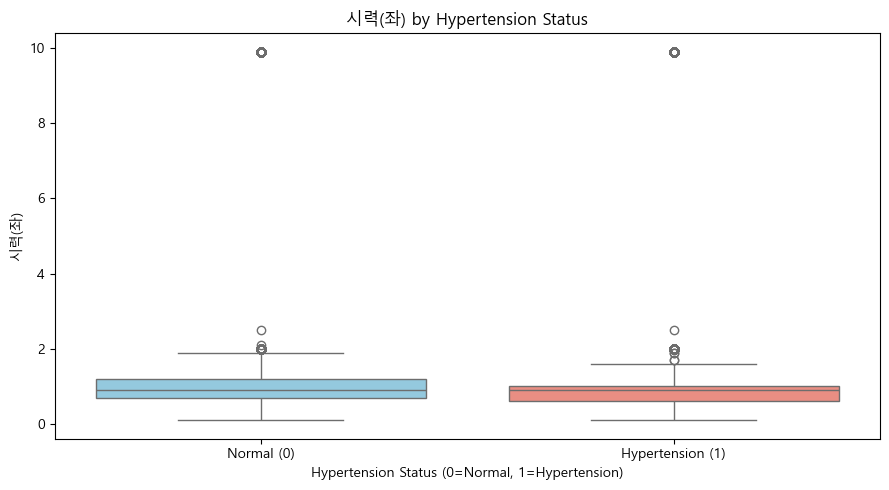

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터프레임 확인 (실제 코드에서는 df_filtered2가 있어야 함)
# print(df_filtered2.columns)

target_col1 = '시력(좌)'

plt.figure(figsize=(9, 5))  # subplot 1개라 크기 줄임

sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col1, palette={'0': 'skyblue', '1': 'salmon'})
plt.title(f'{target_col1} by Hypertension Status')
plt.xlabel('Hypertension Status (0=Normal, 1=Hypertension)')
plt.ylabel(target_col1)
plt.xticks([0, 1], ['Normal (0)', 'Hypertension (1)'])

plt.tight_layout()
plt.show()



# LDL콜레스테롤

Text(0, 0.5, 'Frequency')

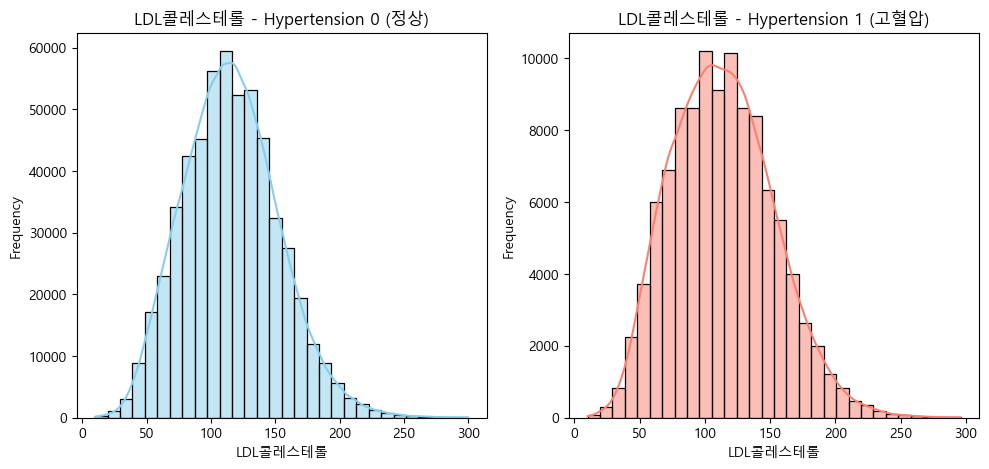

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_col1 = '시력(좌)'
target_col2 = 'LDL콜레스테롤'
target_col3 = '트리글리세라이드'
target_col4 = '식전혈당(공복혈당)'

group_0 = df_filtered2[df_filtered2['hypertension_status'] == 0] #정상
group_1 = df_filtered2[df_filtered2['hypertension_status'] == 1] #고혈압

plt.figure(figsize=(18, 5))

# 1) alt_ast_ratio - 고혈압 0
plt.subplot(1, 3, 1)
sns.histplot(group_0[target_col2], kde=True, bins=30, color='skyblue')
plt.title(f'{target_col2} - Hypertension 0 (정상)')
plt.xlabel(target_col2)
plt.ylabel('Frequency')

# 2) alt_ast_ratio - 고혈압 1
plt.subplot(1, 3, 2)
sns.histplot(group_1[target_col2], kde=True, bins=30, color='salmon')
plt.title(f'{target_col2} - Hypertension 1 (고혈압)')
plt.xlabel(target_col2)
plt.ylabel('Frequency')


C:\Users\asia\AppData\Local\Temp\ipykernel_24044\1315944898.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')


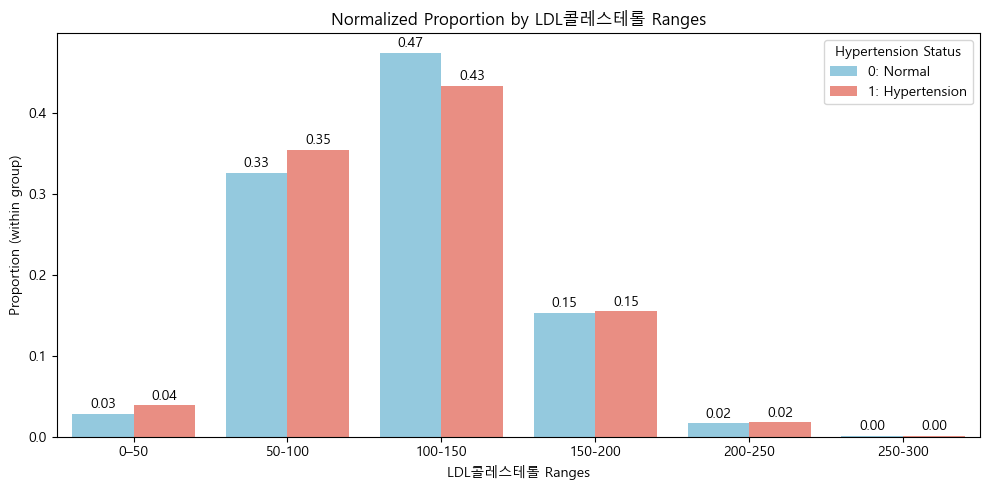

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 대상 변수 설정
target_col2 = 'LDL콜레스테롤'

# 구간 나누기 (0~300, 구간 50 단위 → 6개 구간)
bins = [0, 50, 100, 150, 200, 250, 300]
labels = ['0–50', '50-100', '100-150', '150-200', '200-250', '250-300']

df_filtered2['bin'] = pd.cut(df_filtered2[target_col2], bins=bins, labels=labels, include_lowest=True)

# 각 그룹의 전체 수 (정규화 기준)
total_normal = len(df_filtered2[df_filtered2['hypertension_status'] == 0])
total_hyper = len(df_filtered2[df_filtered2['hypertension_status'] == 1])

# 구간별 count 계산
bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')

# 정규화된 비율 (각 그룹의 전체 수 대비 비율)
def normalize(row):
    if row['hypertension_status'] == 0:
        return row['count'] / total_normal
    else:
        return row['count'] / total_hyper

bin_counts['normalized_ratio'] = bin_counts.apply(normalize, axis=1)

# 시각화
plt.figure(figsize=(10, 5))
barplot = sns.barplot(  # ← barplot 객체로 저장
    data=bin_counts,
    x='bin',
    y='normalized_ratio',
    hue='hypertension_status',
    palette={0: 'skyblue', 1: 'salmon'}  # 각 클래스 색 명시
)

# 막대 위에 수치 표시
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

# 범례 수동 설정
handles, labels = barplot.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['0: Normal', '1: Hypertension'],
    title='Hypertension Status'
)

plt.title(f'Normalized Proportion by {target_col2} Ranges')
plt.xlabel(f'{target_col2} Ranges')
plt.ylabel('Proportion (within group)')
plt.tight_layout()
plt.show()


C:\Users\asia\AppData\Local\Temp\ipykernel_24044\3432918598.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col2, palette={'0': 'skyblue', '1': 'salmon'})


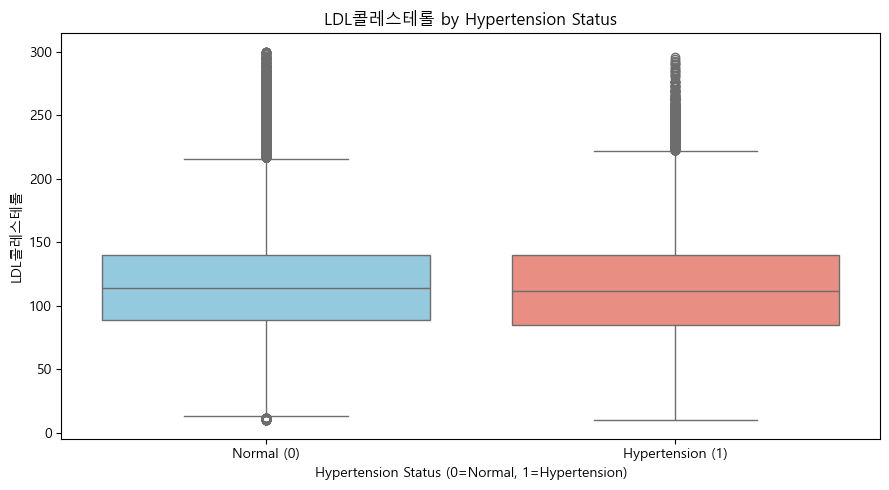

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터프레임 확인 (실제 코드에서는 df_filtered2가 있어야 함)
# print(df_filtered2.columns)

target_col2 = 'LDL콜레스테롤'

plt.figure(figsize=(9, 5))  # subplot 1개라 크기 줄임

sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col2, palette={'0': 'skyblue', '1': 'salmon'})
plt.title(f'{target_col2} by Hypertension Status')
plt.xlabel('Hypertension Status (0=Normal, 1=Hypertension)')
plt.ylabel(target_col2)
plt.xticks([0, 1], ['Normal (0)', 'Hypertension (1)'])

plt.tight_layout()
plt.show()


# 트리글리세라이드

Text(0, 0.5, 'Frequency')

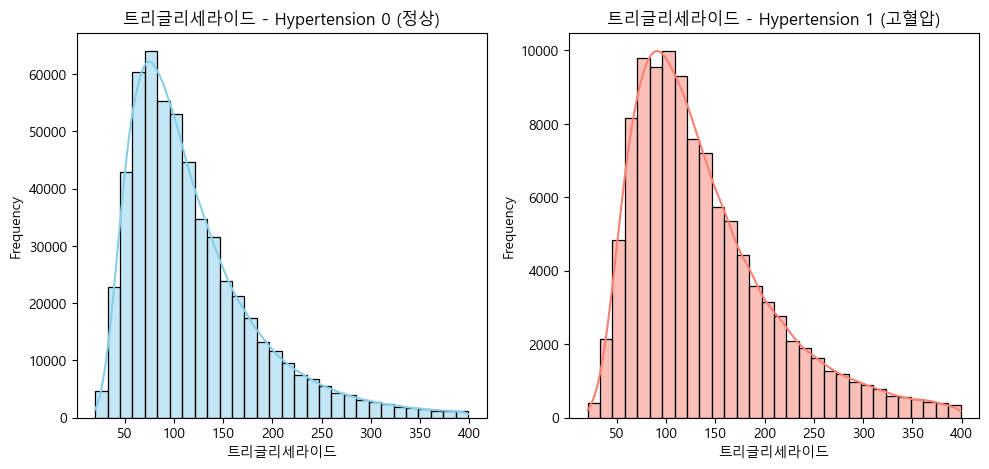

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_col1 = '시력(좌)'
target_col2 = 'LDL콜레스테롤'
target_col3 = '트리글리세라이드'
target_col4 = '식전혈당(공복혈당)'

group_0 = df_filtered2[df_filtered2['hypertension_status'] == 0] #정상
group_1 = df_filtered2[df_filtered2['hypertension_status'] == 1] #고혈압

plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
sns.histplot(group_0[target_col3], kde=True, bins=30, color='skyblue')
plt.title(f'{target_col3} - Hypertension 0 (정상)')
plt.xlabel(target_col3)
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
sns.histplot(group_1[target_col3], kde=True, bins=30, color='salmon')
plt.title(f'{target_col3} - Hypertension 1 (고혈압)')
plt.xlabel(target_col3)
plt.ylabel('Frequency')


C:\Users\asia\AppData\Local\Temp\ipykernel_24044\3561112692.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')


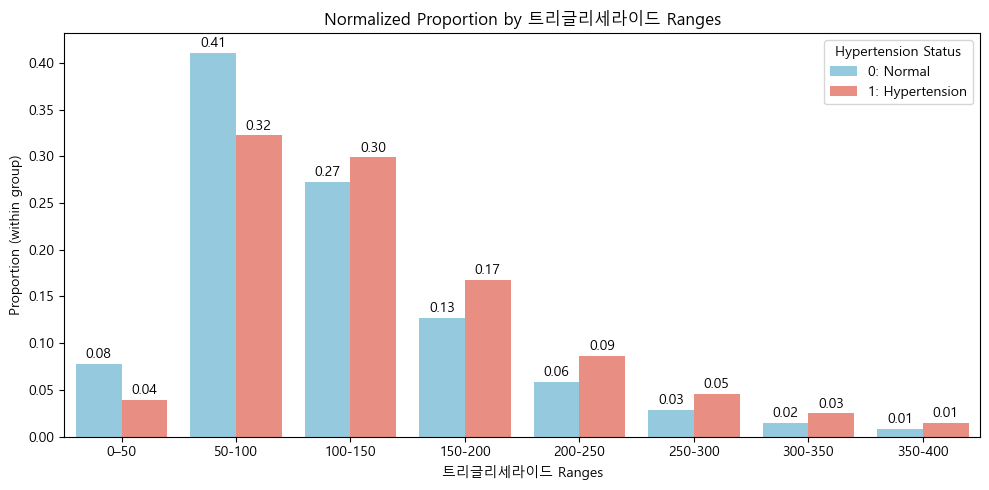

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 대상 변수 설정
target_col3 = '트리글리세라이드'

# 구간 나누기 (0~400, 구간 50 단위 → 8개 구간)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400]
labels = ['0–50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400']

df_filtered2['bin'] = pd.cut(df_filtered2[target_col3], bins=bins, labels=labels, include_lowest=True)

# 각 그룹의 전체 수 (정규화 기준)
total_normal = len(df_filtered2[df_filtered2['hypertension_status'] == 0])
total_hyper = len(df_filtered2[df_filtered2['hypertension_status'] == 1])

# 구간별 count 계산
bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')

# 정규화된 비율 (각 그룹의 전체 수 대비 비율)
def normalize(row):
    if row['hypertension_status'] == 0:
        return row['count'] / total_normal
    else:
        return row['count'] / total_hyper

bin_counts['normalized_ratio'] = bin_counts.apply(normalize, axis=1)

# 시각화
plt.figure(figsize=(10, 5))
barplot = sns.barplot(  # ← barplot 객체로 저장
    data=bin_counts,
    x='bin',
    y='normalized_ratio',
    hue='hypertension_status',
    palette={0: 'skyblue', 1: 'salmon'}  # 각 클래스 색 명시
)

# 막대 위에 수치 표시
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

# 범례 수동 설정
handles, labels = barplot.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['0: Normal', '1: Hypertension'],
    title='Hypertension Status'
)

plt.title(f'Normalized Proportion by {target_col3} Ranges')
plt.xlabel(f'{target_col3} Ranges')
plt.ylabel('Proportion (within group)')
plt.tight_layout()
plt.show()

C:\Users\asia\AppData\Local\Temp\ipykernel_24044\1010156827.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col3, palette={'0': 'skyblue', '1': 'salmon'})


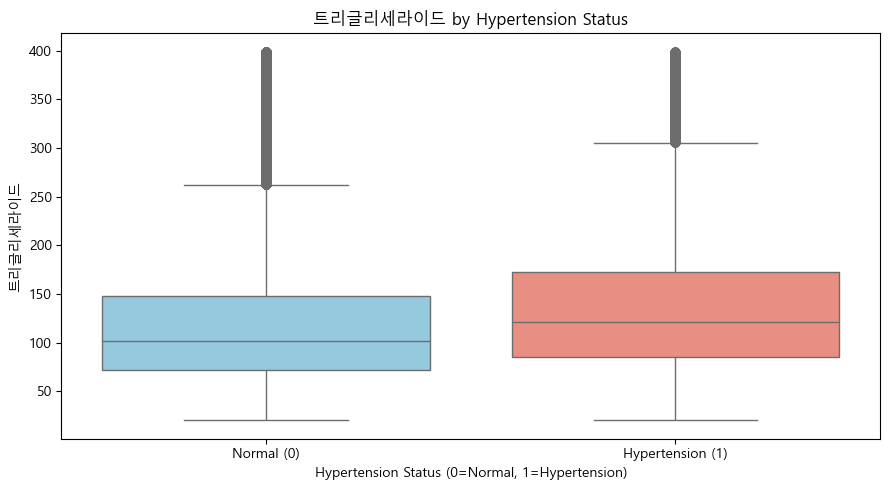

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터프레임 확인 (실제 코드에서는 df_filtered2가 있어야 함)
# print(df_filtered2.columns)

target_col3 = '트리글리세라이드'

plt.figure(figsize=(9, 5))  # subplot 1개라 크기 줄임

sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col3, palette={'0': 'skyblue', '1': 'salmon'})
plt.title(f'{target_col3} by Hypertension Status')
plt.xlabel('Hypertension Status (0=Normal, 1=Hypertension)')
plt.ylabel(target_col3)
plt.xticks([0, 1], ['Normal (0)', 'Hypertension (1)'])

plt.tight_layout()
plt.show()

# 식전혈당(공복혈당)

Text(0, 0.5, 'Frequency')

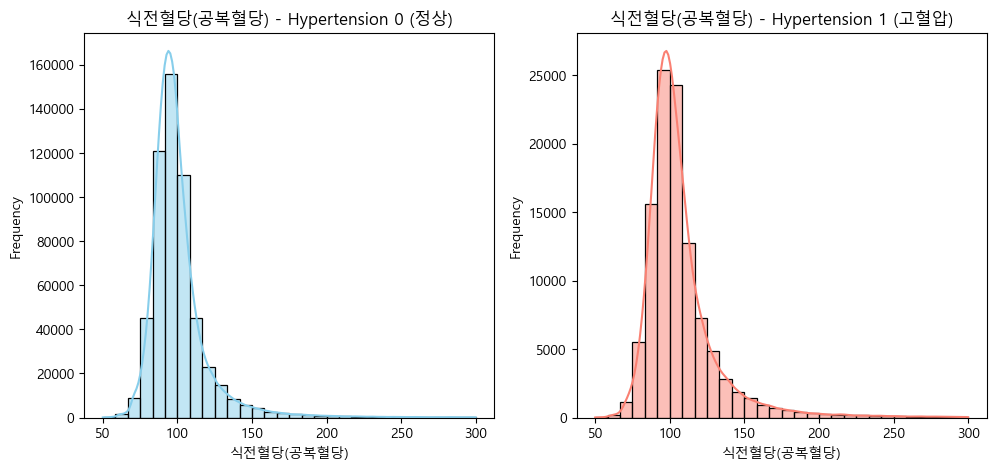

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_col1 = '시력(좌)'
target_col2 = 'LDL콜레스테롤'
target_col3 = '트리글리세라이드'
target_col4 = '식전혈당(공복혈당)'

group_0 = df_filtered2[df_filtered2['hypertension_status'] == 0] #정상
group_1 = df_filtered2[df_filtered2['hypertension_status'] == 1] #고혈압

plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
sns.histplot(group_0[target_col4], kde=True, bins=30, color='skyblue')
plt.title(f'{target_col4} - Hypertension 0 (정상)')
plt.xlabel(target_col4)
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
sns.histplot(group_1[target_col4], kde=True, bins=30, color='salmon')
plt.title(f'{target_col4} - Hypertension 1 (고혈압)')
plt.xlabel(target_col4)
plt.ylabel('Frequency')

C:\Users\asia\AppData\Local\Temp\ipykernel_24044\1175619796.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')


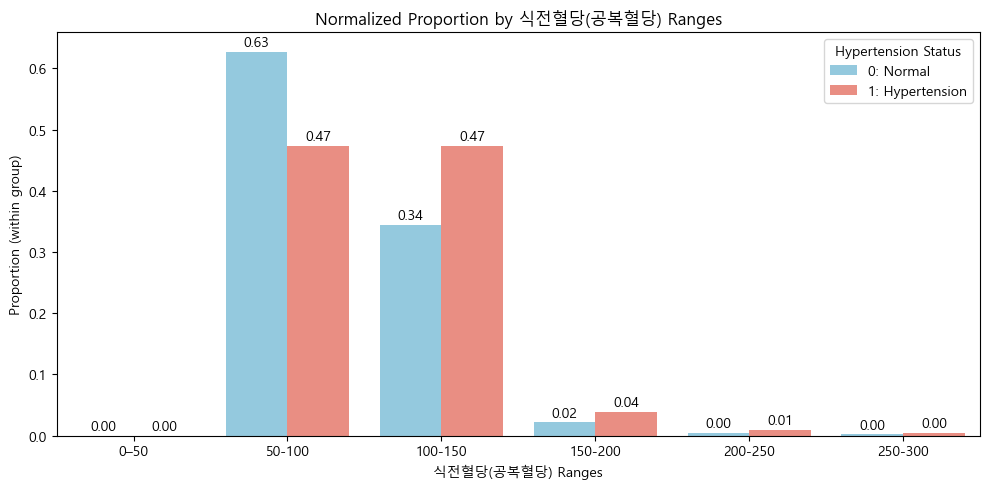

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 대상 변수 설정
target_col4 = '식전혈당(공복혈당)'

# 구간 나누기 (0~300, 구간 50 단위 → 6개 구간)
bins = [0, 50, 100, 150, 200, 250, 300]
labels = ['0–50', '50-100', '100-150', '150-200', '200-250', '250-300']

df_filtered2['bin'] = pd.cut(df_filtered2[target_col4], bins=bins, labels=labels, include_lowest=True)

# 각 그룹의 전체 수 (정규화 기준)
total_normal = len(df_filtered2[df_filtered2['hypertension_status'] == 0])
total_hyper = len(df_filtered2[df_filtered2['hypertension_status'] == 1])

# 구간별 count 계산
bin_counts = df_filtered2.groupby(['bin', 'hypertension_status']).size().reset_index(name='count')

# 정규화된 비율 (각 그룹의 전체 수 대비 비율)
def normalize(row):
    if row['hypertension_status'] == 0:
        return row['count'] / total_normal
    else:
        return row['count'] / total_hyper

bin_counts['normalized_ratio'] = bin_counts.apply(normalize, axis=1)

# 시각화
plt.figure(figsize=(10, 5))
barplot = sns.barplot(  # ← barplot 객체로 저장
    data=bin_counts,
    x='bin',
    y='normalized_ratio',
    hue='hypertension_status',
    palette={0: 'skyblue', 1: 'salmon'}  # 각 클래스 색 명시
)

# 막대 위에 수치 표시
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.2f', label_type='edge', padding=2)
    
 # 범례 수동 설정
handles, labels = barplot.get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['0: Normal', '1: Hypertension'],
    title='Hypertension Status'
)

plt.title(f'Normalized Proportion by {target_col4} Ranges')
plt.xlabel(f'{target_col4} Ranges')
plt.ylabel('Proportion (within group)')
plt.tight_layout()
plt.show()

C:\Users\asia\AppData\Local\Temp\ipykernel_24044\3381344559.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col4, palette={'0': 'skyblue', '1': 'salmon'})


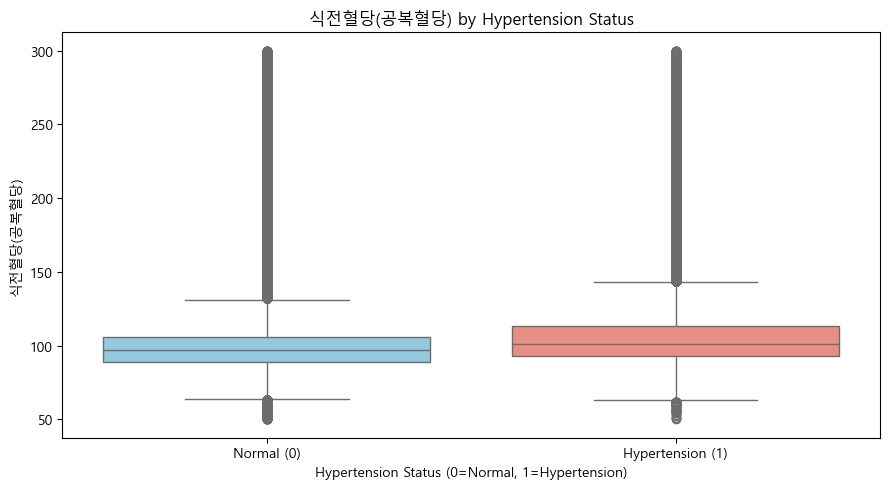

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 예시 데이터프레임 확인 (실제 코드에서는 df_filtered2가 있어야 함)
# print(df_filtered2.columns)

target_col4 = '식전혈당(공복혈당)'

plt.figure(figsize=(9, 5))  # subplot 1개라 크기 줄임

sns.boxplot(data=df_filtered2, x='hypertension_status', y=target_col4, palette={'0': 'skyblue', '1': 'salmon'})
plt.title(f'{target_col4} by Hypertension Status')
plt.xlabel('Hypertension Status (0=Normal, 1=Hypertension)')
plt.ylabel(target_col4)
plt.xticks([0, 1], ['Normal (0)', 'Hypertension (1)'])

plt.tight_layout()
plt.show()

# 왜도, 첨도 확인

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# 수치형 변수만 선택
numeric_cols = df_filtered2.select_dtypes(include=['number']).columns

# 왜도와 첨도 계산
skew_kurtosis_df = pd.DataFrame({
    'Skewness': df_filtered2[numeric_cols].apply(skew),
    'Kurtosis': df_filtered2[numeric_cols].apply(kurtosis)
})

# 소수점 둘째 자리까지 반올림
skew_kurtosis_df = skew_kurtosis_df.round(2)

# 왜도 기준으로 정렬
skew_kurtosis_df = skew_kurtosis_df.sort_values(by='Skewness', ascending=False)

print(skew_kurtosis_df.to_string())


                     Skewness  Kurtosis
시력(우)                   10.36    150.84
ggtp_alt_ratio          10.36    422.39
시력(좌)                   10.30    149.46
혈청지오티(AST)               6.88    100.45
감마지티피                    5.72     51.98
혈청지피티(ALT)               4.72     44.12
요단백                      4.49     23.09
alt_ast_ratio            3.94    161.84
식전혈당(공복혈당)               3.07     15.85
혈청크레아티닌                  3.01     43.60
tg_hdl_ratio             1.85      5.03
hypertension_status      1.83      1.36
트리글리세라이드                 1.36      1.96
흡연상태                     0.96     -0.73
ldl_hdl_ratio            0.84      1.34
HDL콜레스테롤                 0.80      1.05
pulse_pressure           0.74      1.58
bmi                      0.71      1.44
체중(5kg단위)                0.70      0.85
수축기혈압                    0.48      0.94
이완기혈압                    0.34      0.69
LDL콜레스테롤                 0.33      0.13
허리둘레                     0.31      0.37
총콜레스테롤                   0.30      0.11


## 왜도(skewness) = 비대칭성
정의: 분포가 평균 기준으로 얼마나 비대칭인지 나타냅니다.

해석:

왜도 ≈ 0: 대칭적인 분포 (정규분포에 가까움)

왜도 > 0: 오른쪽으로 꼬리가 긴 분포 (우측 비대칭)

왜도 < 0: 왼쪽으로 꼬리가 긴 분포 (좌측 비대칭)

✅ 스케일링/변환 적용 기준:
왜도가 |1| 이상이면, 정규성을 크게 벗어난 분포라고 간주하고 로그 변환, Box-Cox, Yeo-Johnson 등의 **정규화 변환(normalization)**이 필요할 수 있습니다.

## ㅣ왜도ㅣ>=1 - 로그 변환시킨 칼럼 + ㅣ왜도ㅣ< 1 - 원래 상태 유지한 칼럼 = df_log_transformed

In [ ]:
import numpy as np

# 왜도의 절댓값 기준으로 컬럼 분리
high_skew_cols = skew_kurtosis_df[skew_kurtosis_df['Skewness'].abs() >= 1].index
low_skew_cols = skew_kurtosis_df[skew_kurtosis_df['Skewness'].abs() < 1].index

# 로그 변환 (음수나 0이 있을 수 있으므로 1 더해줌)
df_log = df_filtered2[high_skew_cols].apply(lambda x: np.log1p(x))
df_log.columns = [col + '_log' for col in df_log.columns]  # 컬럼명 뒤에 '_log' 붙이기

# 그대로 유지할 변수는 복사
df_no_log = df_filtered2[low_skew_cols].copy()

# 두 그룹 합치기
df_log_transformed = pd.concat([df_log, df_no_log], axis=1)


C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df_log_transformed.columns

Index(['시력(우)_log', 'ggtp_alt_ratio_log', '시력(좌)_log', '혈청지오티(AST)_log',
       '감마지티피_log', '혈청지피티(ALT)_log', '요단백_log', 'alt_ast_ratio_log',
       '요단백_log_log', '식전혈당(공복혈당)_log', '혈청크레아티닌_log', 'tg_hdl_ratio_log',
       'hypertension_status_log_log', 'hypertension_status_log',
       '식전혈당(공복혈당)_log_log', '트리글리세라이드_log', '혈청지오티(AST)_log_log',
       '시력(좌)_log_log', '시력(우)_log_log', '흡연상태', '감마지티피_log', 'ldl_hdl_ratio',
       'HDL콜레스테롤', 'pulse_pressure', 'bmi', '체중(5kg단위)', '혈청지피티(ALT)_log',
       'ggtp_alt_ratio_log', '수축기혈압', '이완기혈압', 'LDL콜레스테롤', '허리둘레', '총콜레스테롤',
       '성별코드', '트리글리세라이드_log', 'tg_hdl_ratio_log', '연령대코드(5세단위)', '신장(5cm단위)',
       'alt_ast_ratio_log', '혈청크레아티닌_log', '혈색소', '음주여부'],
      dtype='object')

In [74]:
import pandas as pd
df_log_transformed.to_csv("../data/processed/df_log_transformed.csv", index=False)

## 첨도 (Kurtosis) — 뾰족함
정의: 분포의 중심이 얼마나 뾰족한지를 나타냅니다.

해석:

첨도 ≈ 3: 정규분포와 유사 (중심이 적당히 뾰족함)

첨도 > 3: 뾰족한 분포 — 이상치가 많을 가능성

첨도 < 3: 평평한 분포 — 중심 집중도가 낮음

✅ 스케일링/변환 적용 기준:
첨도가 클수록 이상치(outliers)가 많을 가능성이 높기 때문에, RobustScaler (중앙값 기준), 또는 변환을 적용해 이상치 영향을 줄여야 합니다.

In [69]:
from sklearn.preprocessing import RobustScaler

# 첨도 기준 설정 (3 이상)
kurtosis_threshold = 3
high_kurtosis_cols = skew_kurtosis_df[skew_kurtosis_df['Kurtosis'] >= kurtosis_threshold].index

# RobustScaler 적용
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_filtered2[high_kurtosis_cols])

# 스케일링된 DataFrame 생성
df_robust_scaled = pd.DataFrame(scaled_data, columns=[col + '_robust' for col in high_kurtosis_cols], index=df_filtered2.index)


In [70]:
df_robust_scaled.columns

Index(['시력(우)_robust', 'ggtp_alt_ratio_robust', '시력(좌)_robust',
       '혈청지오티(AST)_robust', '감마지티피_robust', '혈청지피티(ALT)_robust', '요단백_robust',
       'alt_ast_ratio_robust', '요단백_log_robust', '식전혈당(공복혈당)_robust',
       '혈청크레아티닌_robust', 'tg_hdl_ratio_robust', '식전혈당(공복혈당)_log_robust',
       '혈청지오티(AST)_log_robust', '시력(좌)_log_robust', '시력(우)_log_robust'],
      dtype='object')